# Transverse wake field function in 2D
The transverse wake field function depends not only on the longitudinal position, but also and the transverse ones, here reduced to the radial position. The wake field function describes the field acting on a trailing particle at $r_t, z$ relative to a leading, wake-exciting particle at $r_s, 0$. The function is parametrized as $w_t(r_t, r_s, z)$.

In [1]:
import logging

log_format = "%(asctime)s [%(threadName)-10.10s] [%(name)-14.14s] [%(levelname)-5.5s]  %(message)s"
logging.basicConfig( #filename='{:%Y-%m-%dT%H%M%S}.log'.format(datetime.now()),
                    level=logging.INFO,
                    format=log_format,)
# child logger for local use
logger = logging.getLogger(__name__ + '.nb')
logger.setLevel(logging.DEBUG)


In [2]:
import sys
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib.ticker as ticker
from scipy.constants import e as qelec, epsilon_0 as epsilon0

2024-07-10 17:07:09,156 [MainThread] [numexpr.utils ] [INFO ]  NumExpr defaulting to 8 threads.


In [3]:
sys.path.append('../') 
from DWFA_cyl_func_Ng import FindMode, multimode_trans_greens_function, multimode_multipos_trans_greens_function

In [4]:
a = 0.69e-3
b = 1.29e-3
eps_r = 9.6
l_dlw = 0.09

m_range = (1,8)
n_max = 8

In [5]:
mode_ampl = np.empty((m_range[1] - m_range[0], n_max))
mode_wave_vec = np.empty_like(mode_ampl)

for m in range(*m_range):
    logger.info(f"Computing {n_max} amplitudes and wavevectors for angular mode number m={m}...")
    mode_ampl[m - m_range[0]], mode_wave_vec[m - m_range[0]] =\
        FindMode(b, a, n=m, epsilon=eps_r, Nmode = n_max, num_k_sampling = 500) 

max_wvl = 2*np.pi/np.min(mode_wave_vec)
logger.debug(f"Max. wavelength: {max_wvl:1.2e} m")
min_wvl = 2*np.pi/np.max(mode_wave_vec)
logger.debug(f"Min. wavelength: {min_wvl:1.2e} m")

2024-07-10 17:07:09,680 [MainThread] [__main__.nb   ] [INFO ]  Computing 8 amplitudes and wavevectors for angular mode number m=1...
2024-07-10 17:07:09,701 [MainThread] [DWFA_cyl_func_] [INFO ]  
    ----- Summary ------
    mode order =1
    Roots:[ 2336.130675    3717.16629328  7384.86699626  8375.70412892
 12371.58365912 13423.4140709  17383.83530015 18569.75782818]
    dDisp:[ 0.83437312 -0.43829695  0.13101157 -0.11469033  0.08116283 -0.0752412
  0.06700684 -0.06344291]
    Mode Amplitudes:[1.54766728e+17 1.27713745e+18 9.46421041e+17 1.20233750e+18
 1.34658268e+18 7.49116520e+17 1.39677066e+18 4.73214599e+17]
    Mode WaveVectors / m^-1 :[ 796.61394831 1267.54318544 2518.2187446  2856.0914025  4218.6750129
 4577.34620636 5927.83863649 6332.23486208]
    Mode Wavelengths /m :[0.00788737 0.00495698 0.00249509 0.00219992 0.00148937 0.00137267
 0.00105995 0.00099225]
    --------------------
2024-07-10 17:07:09,701 [MainThread] [__main__.nb   ] [INFO ]  Computing 8 amplitudes and wa

In [6]:
pd.DataFrame(mode_wave_vec, columns=np.arange(n_max), index=np.arange(*m_range))\
    .rename_axis('angular mode index m' , axis=0).rename_axis('radial mode index n' , axis=1)

radial mode index n,0,1,2,3,4,5,6,7
angular mode index m,,,,,,,,
1,796.613948,1267.543185,2518.218745,2856.091403,4218.675013,4577.346206,5927.838636,6332.234862
2,978.694317,1525.043900,2641.524609,3006.088721,4336.612105,4675.969616,6050.128758,6405.005416
3,1205.896001,1796.989046,2784.543681,3186.564312,4450.587238,4798.906325,6155.449941,6496.622457
4,1458.774383,2078.250762,2955.075652,3392.104818,4576.502269,4944.214480,6262.405888,6606.337958
5,1725.372962,2365.507649,3152.364058,3618.309219,4719.603562,5109.890679,6378.529162,6733.252046
6,1999.082702,2656.432681,3373.058720,3861.545575,4881.333166,5294.030939,6507.076948,6876.407879
7,2276.267260,2949.381858,3613.155300,4118.743382,5061.505649,5494.868329,6649.394997,7034.843234


In [7]:
pd.DataFrame(mode_ampl, columns=np.arange(n_max), index=np.arange(*m_range))\
    .rename_axis('angular mode index m' , axis=0).rename_axis('radial mode index n' , axis=1)

radial mode index n,0,1,2,3,4,5,6,7
angular mode index m,,,,,,,,
1,1.547667e+17,1.277137e+18,9.464210e+17,1.202337e+18,1.346583e+18,7.491165e+17,1.396771e+18,4.732146e+17
2,5.590855e+16,9.573807e+17,5.727098e+17,1.458355e+18,1.078150e+18,1.161777e+18,1.347840e+18,8.371820e+17
3,2.374034e+16,6.705651e+17,3.492369e+17,1.452224e+18,7.991310e+17,1.407096e+18,1.143053e+18,1.139695e+18
4,1.105086e+16,4.538600e+17,2.191936e+17,1.321027e+18,5.848423e+17,1.508489e+18,9.269203e+17,1.351322e+18
5,5.421976e+15,2.995014e+17,1.405735e+17,1.140593e+18,4.306650e+17,1.509596e+18,7.412621e+17,1.477113e+18
6,2.738840e+15,1.932852e+17,9.111778e+16,9.496917e+17,3.203624e+17,1.446372e+18,5.920565e+17,1.533335e+18
7,1.403665e+15,1.221731e+17,5.915553e+16,7.680367e+17,2.403888e+17,1.344082e+18,4.746644e+17,1.536895e+18


In [8]:
current_offset = 0.5e-3
r_array = np.linspace(-100e-6, 100e-6, 21) + current_offset
z_pos = np.linspace(0, max_wvl, 1001)


In [13]:
# %%timeit -r 1 -n 1
transverse_wake_func_2d = multimode_multipos_trans_greens_function(
    mode_ampl, mode_wave_vec, np.arange(*m_range),
    r_array, r_array, z_pos, 
    a, b, eps_r
)

In [86]:
idx_r_s = 10
idx_r_t = 10 
r_array[idx_r_s], r_array[idx_r_t]

(0.0005, 0.0005)

In [87]:
z_multi, wake_multi = multimode_trans_greens_function(mode_ampl, mode_wave_vec, m_modes = np.arange(*m_range), 
     r0=r_array[idx_r_s], r= r_array[idx_r_t], theta= np.deg2rad(0), 
     zmin= z_pos[0], zmax= z_pos[-1], Nz= z_pos.shape[0], 
     b = a, a= b, epsilon= eps_r)

Text(0.05, 0.05, '$r_{source} = $ 500 µm\n$r_{trailing} = $ 500 µm\n')

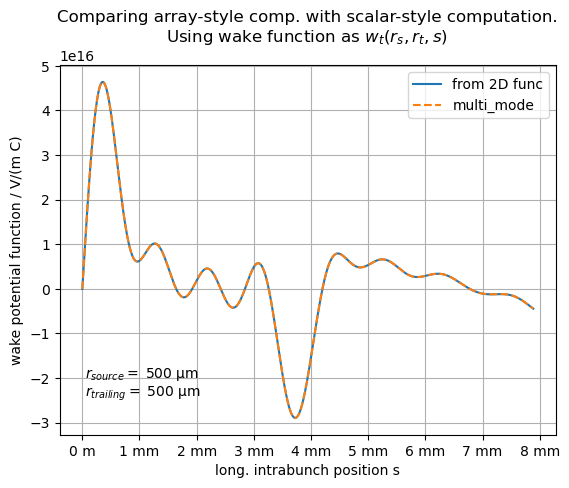

In [88]:
fig, ax = plt.subplots()
ax.plot(z_pos, transverse_wake_func_2d[idx_r_s, idx_r_t, :], label='from 2D func')
ax.plot(z_multi, wake_multi, '--', label = 'multi_mode')
ax.xaxis.set_major_formatter(m_formatter := ticker.EngFormatter(unit='m'))
ax.set_ylabel('wake potential function / V/(m C)')
ax.set_xlabel('long. intrabunch position s')
ax.set_title('Comparing array-style comp. with scalar-style computation.\nUsing wake function as $w_t(r_s, r_t, s)$ ')
ax.legend()
ax.grid()
ax.text(0.05, 0.05, f'$r_{{source}} = $ {m_formatter(r_array[idx_r_s])}\n' + f'$r_{{trailing}} = $ {m_formatter(r_array[idx_r_t])}\n', 
        transform=ax.transAxes)

The radial positions of source and trailing particle were varied via the indices to verify that the two implementations line up. But for the case of several radial positions, it is clear that the 2D version is faster.

In [89]:
zz, RR = np.meshgrid(z_pos, r_array)

In [90]:
import seaborn as sns
cmap = sns.color_palette("icefire", as_cmap=True)

In [91]:
plt.style.use('default')

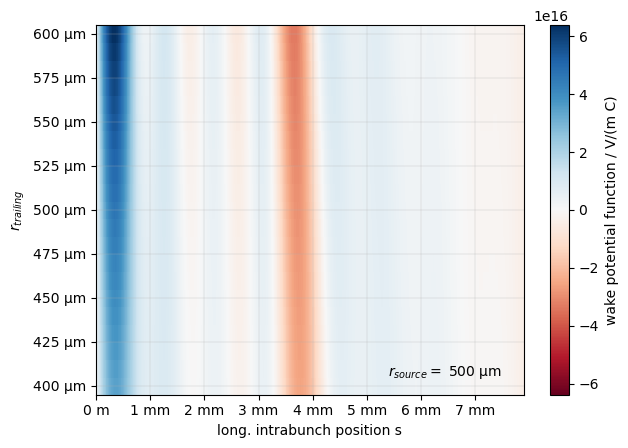

In [92]:
fig, ax = plt.subplots(figsize=(6.9, 4.8))
c_mappable = ax.pcolor(zz,RR,transverse_wake_func_2d[idx_r_s,:,:], cmap='RdBu', 
          vmin = -np.max(transverse_wake_func_2d[idx_r_s,:,:]),
          vmax = np.max(transverse_wake_func_2d[idx_r_s,:,:]) )
ax.xaxis.set_major_formatter(m_formatter := ticker.EngFormatter(unit='m'))
ax.yaxis.set_major_formatter(m_formatter)

# ax.set_ylabel('wake potential function / V/(m C)')
ax.set_ylabel('$r_{trailing}$')
ax.set_xlabel('long. intrabunch position s')
ax.text(0.95, 0.05, f'$r_{{source}} = $ {m_formatter(r_array[idx_r_s])}', horizontalalignment='right',
        transform=ax.transAxes)
cbar = fig.colorbar(c_mappable, ax=ax)
cbar.set_label('wake potential function / V/(m C)')

ax.grid(lw=0.2)

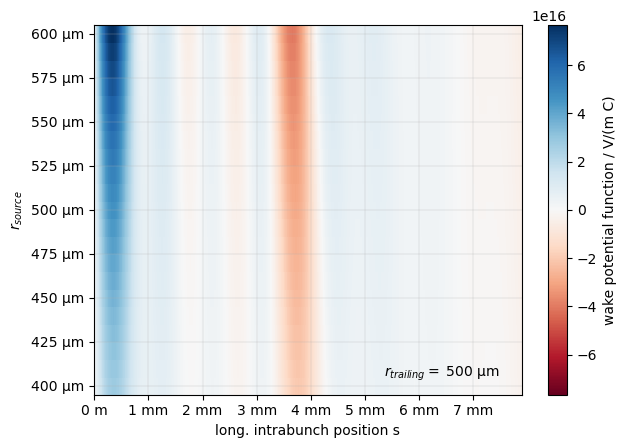

In [93]:
fig, ax = plt.subplots(figsize=(6.9, 4.8))
c_mappable = ax.pcolor(zz,RR,transverse_wake_func_2d[:,idx_r_t,:], cmap='RdBu', 
          vmin = -np.max(transverse_wake_func_2d[:,idx_r_t,:]),
          vmax = np.max(transverse_wake_func_2d[:,idx_r_t,:]) )
ax.xaxis.set_major_formatter(m_formatter := ticker.EngFormatter(unit='m'))
ax.yaxis.set_major_formatter(m_formatter)

# ax.set_ylabel('wake potential function / V/(m C)')
ax.set_ylabel('$r_{source}$')
ax.set_xlabel('long. intrabunch position s')
ax.text(0.95, 0.05, f'$r_{{trailing}} = $ {m_formatter(r_array[idx_r_t])}', horizontalalignment='right',
        transform=ax.transAxes)
cbar = fig.colorbar(c_mappable, ax=ax)
cbar.set_label('wake potential function / V/(m C)')

ax.grid(lw=0.2)